![](/images/waveforms.png#centerme)

Sound synthesis is all about combining basic electrical waveforms and processing them through different modules or components in order to obtain an output that either emulates sounds found in physical instruments or make new sound effects or musical tones. The main synthesizer component in charge of generating the output signal is the [Voltage Controlled Oscillator](https://en.wikipedia.org/wiki/Voltage-controlled_oscillator) (VCO). The most common generated signals in a synthesizer are sine, square, sawtooth and triangle. I wanted to make the excercise of analyzing these signals from the harmonics point of view, the visual aid is always useful if you want to understand exactly what a harmonic is.

### Signals and Harmonics
&nbsp;

What are harmonics? For starters, it is not a sole property of musical theory. It is a property of waves in general. Where there are waves involved, there is a harmonic analysis that can be done. That is why we talk about harmonics in music, where the sound waves are generated from the physical interaction with the musical instruments. Music synthesis is no different, we generate the harmonics from electrical waves which are eventualy transformed into sound waves.

So how can we define a harmonic? We can keep it simple by saying that if you have a wave that has a given frequency `F`, a harmonic is a wave that has a frequency which is a multiple of `F`. You can generate a new wave with a different shape by summing the two signals. This will make `F` the fundamental frequency of that signal.

There are two ways that you can help yourself wrap your head around this. You can read about the [Overdertone Series](https://en.wikipedia.org/wiki/Harmonic_series_(music)), which is the music theory approach for understanding harmonics, or you can read about the [Fourier Series](https://en.wikipedia.org/wiki/Fourier_series) which is the full mathematical foundation of sound synthesis.

It is hard to understand this and that is why the visual aid always helps. We will see exactly how a sine wave looks like and the rest of the basic signals used in music synthesis. We will be able to listen to them also and notice how the sound changes when there are different harmonics present in a wave. For this, we will be using the [Fourier Transform](https://en.wikipedia.org/wiki/Fourier_transform) in order to visualize the different harmonic components of a given signal.

That is why this post is written as a jupyter notebook, so we can get hands on with python for visualizing everything.

### Importing Necessary Modules
&nbsp;

I will use pandas as a plotter helper, I have found it is an easier way to deal with matplotlib. Numpy and Scipy are used to generate the signals that we want to analyze. In addition, Scipy will provide the necesarry functions to do the [Fast Fourier transform](https://en.wikipedia.org/wiki/Fast_Fourier_transform), which is what we need in order to visualize the harmonic content of the waves.

In [1]:
import pandas as pd
import numpy as np
from scipy import signal
from scipy.fftpack import fft, fftfreq
import IPython.display as ipd
import matplotlib.pyplot as plt

### Define The Signals
&nbsp;

As I mentioned above, we will be generating four signals:
- Sine
- Sawtooth
- Square
- Triangle

They will be plotted and audible.

In [2]:
wave_types = {
    "sine": np.sin, 
    "saw": signal.sawtooth, 
    "square": signal.square, 
    "triangle": lambda w: signal.sawtooth(w, 0.5)
}

### Audio and Plot
&nbsp;

We define our python function that will help us plot and listen to the signals.

In [3]:
def play_and_plot_wave(
    wave_type: str, 
    frequency: float = 440, 
    duration: int = 2, 
    amplitude: float = 0.01
) -> None:
    sr = 44100 # Sample Rate in Hz
    phases = np.cumsum(2.0 * np.pi * frequency / sr * np.ones(int(sr * float(duration))))
    wave = wave_types.get(wave_type)(phases) * amplitude
    yf = fft(wave)
    xf = fftfreq(len(wave)) * sr
    
    plot_args = {"figsize": (6, 4), "legend": False} # Plot arguments
    fig, (axis1, axis2) = plt.subplots(2, 1, constrained_layout=True)
    axis1.set_title('Signal', fontsize=12)
    axis1.set_yticks([])
    axis2.set_title('FFT', fontsize=12)
    axis2.set_yticks([])
    axis2.set_xticks(np.arange(1, 11) * frequency)
    
    pd.Series(
        np.abs(yf), index=xf
    ).plot(xlabel="Frequency (Hz)", xlim=(frequency / 2, frequency * 10), ax=axis2, **plot_args)
    
    pd.Series(
        wave, index=np.arange(5, len(wave)+ 5) * (1000 / sr)
    ).plot(xlabel="Time (ms)", xlim=(0, 20), ax=axis1, **plot_args)

    display(ipd.Audio(wave, rate=sr, normalize=False))

### Analyze The Waves
&nbsp;

We now proceed to look into each wave and understanding the graphs being displayed. Each wave will be generated with a 440Hz frequency (musical note A) and we will be able to visualize up to the 10th harmonic in the plot. 
&nbsp;

### WARNING
&nbsp;

Be careful when listening to the audio. If you are wearing headphones, turned down the volume or take them off.

### Sine Wave
&nbsp;

The sine wave is the fundamental wave shape. From this, every other wave shape is formed. When we talk about any type of complex wave, we can always decompose them to a sum of the fundamental sine wave with its harmonics. 

As you can see below, the top part of the graph shows you how a sine wave looks like. The bottom portion shows you the frequency components the wave has. We only see one frequency component at 440Hz, which is its fundamental frequency. So far, everything checks. The sine wave is in fact a "pure" fundamental wave and it makes sense to think that other wave shapes can be derived from it.

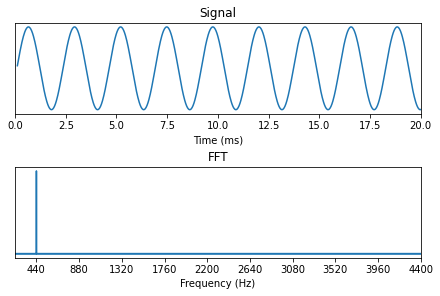

In [4]:
play_and_plot_wave("sine")

### Square Wave
&nbsp;

Square waves are used in many electronics applications, the most common one is for clock signals in digital circuits. In music synthesis, it is one of the most common and it is worth taking a closer look at it.

Below we see again the wave shape along with its frequency components. Different to the sine wave, we see 5 different frequency components. The one with the greater magnitude lies in the fundamental frequency of 440Hz, the rest are its harmonic components. As we can see, and this is one of the interesting parts, there are only odd harmonics (frequencies multiple of 3, 5, 7 and 9) which seem to decay in magnitude exponentially. This means that we could break down this signal into at least 5 different sine waves with different weights and frequencies based on odd multiples of the fundamental frequency.

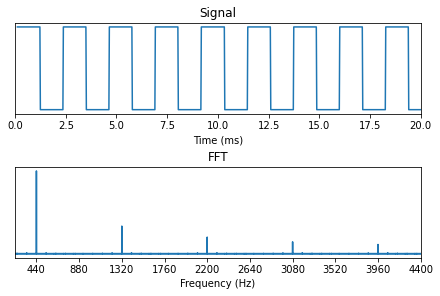

In [5]:
play_and_plot_wave("square")

### Sawtooth Wave
&nbsp;

Into the sawtooth wave. Also known in music synthesis as plain `saw` or `ramp`, it is also very common in synthesizer hardware architectures. 

Going directly to the harmonic analysis, we see that this wave has frequency components in all 10 harmonics and they also have their magnitude decaying exponentially. I often heard that in music synthesis the sawtooth wave is considered "rich in harmonic content" and now I understand why. The same principle applies as in the previous example: we could break down this signal into at least 10 different sine waves with different weights and frequencies based on odd multiples of the fundamental frequency.

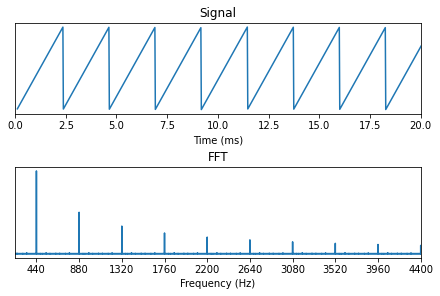

In [6]:
play_and_plot_wave("saw")

### Triangle Wave
&nbsp;

The triangle wave is not as popular in synthesizer architectures as the square and sawtooth when being used in a VCO. When it is present, it is mostly considered for bass sounds or "suboscillator" usage.

The harmonic content of this wave is low, sharing the common characteristic of the square wave which is only odd harmonics are present. The difference is in the order of magnitude, which is obviously lower. If you can listen to the wave, the sound is much closer to the sine wave than to the square wave. 

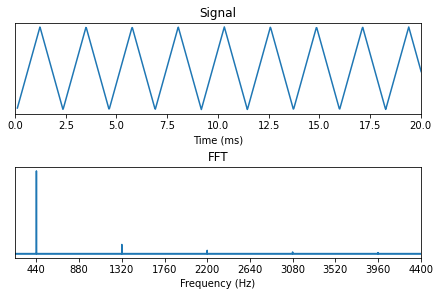

In [7]:
play_and_plot_wave("triangle")


### Summing Up
&nbsp;

We got to take a closer look into 4 different wave shapes most commonly used in music synthesis. The most harmonically rich wave is the sawtooth, followed by the square and triangle. Harmonics are not a musical concept, it is a property that we defined to help us describe complex waves in general.

Hopefully when you listen or read about "harmonic content" of a wave when looking into synths, you will now have a better idea of what they are reffering to. 

There is a lot to talk about on how to manipulate harmonics in sound design. How there are substractive, additive and FM synthesis and how all of those  techniques manipulate harmonics to obtain different results in sound waves. But that might be a subject of future posts.